In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
!pip install xgboost
from xgboost import XGBRFRegressor



In [2]:
df1 = pd.read_csv('pizza_v1.csv')
df2 = pd.read_csv('pizza_v2.csv')

In [3]:
df1.head()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese
0,A,"Rp235,000",22.0,chicken,double_signature,jumbo,yes,yes
1,A,"Rp198,000",20.0,papperoni,double_signature,jumbo,yes,yes
2,A,"Rp120,000",16.0,mushrooms,double_signature,reguler,yes,yes
3,A,"Rp155,000",14.0,smoked beef,double_signature,reguler,yes,no
4,A,"Rp248,000",18.0,mozzarella,double_signature,jumbo,yes,no


In [4]:
df2.head()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,"Rp235,000",22 inch,chicken,double_signature,jumbo,yes,yes,no
1,A,"Rp198,000",20 inch,papperoni,double_signature,jumbo,yes,yes,no
2,A,"Rp120,000",16 inch,mushrooms,double_signature,reguler,yes,yes,yes
3,A,"Rp155,000",14 inch,smoked_beef,double_signature,reguler,yes,no,yes
4,A,"Rp248,000",18 inch,mozzarella,double_signature,jumbo,yes,no,yes


In [5]:
print(df1.shape)
print(df2.shape)

(129, 8)
(129, 9)


In [6]:
df1['extra_mushrooms'] = df2['extra_mushrooms']
df1.head()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,"Rp235,000",22.0,chicken,double_signature,jumbo,yes,yes,no
1,A,"Rp198,000",20.0,papperoni,double_signature,jumbo,yes,yes,no
2,A,"Rp120,000",16.0,mushrooms,double_signature,reguler,yes,yes,yes
3,A,"Rp155,000",14.0,smoked beef,double_signature,reguler,yes,no,yes
4,A,"Rp248,000",18.0,mozzarella,double_signature,jumbo,yes,no,yes


In [7]:
df = df1
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   company          129 non-null    object 
 1   price_rupiah     129 non-null    object 
 2   diameter         129 non-null    float64
 3   topping          129 non-null    object 
 4   variant          129 non-null    object 
 5   size             129 non-null    object 
 6   extra_sauce      129 non-null    object 
 7   extra_cheese     129 non-null    object 
 8   extra_mushrooms  129 non-null    object 
dtypes: float64(1), object(8)
memory usage: 9.2+ KB


In [8]:
df['price'] = df['price_rupiah'].str.replace('Rp', '').str.replace(',','').astype('float64')
df.drop(['price_rupiah'], axis = 1, inplace = True)

In [9]:
df.nunique()

company             5
diameter           11
topping            12
variant            20
size                6
extra_sauce         2
extra_cheese        2
extra_mushrooms     2
price              43
dtype: int64

In [10]:
df.isna().any()

company            False
diameter           False
topping            False
variant            False
size               False
extra_sauce        False
extra_cheese       False
extra_mushrooms    False
price              False
dtype: bool

In [11]:
df.head()

,company,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms,price
0,A,22.0,chicken,double_signature,jumbo,yes,yes,no,235000.0
1,A,20.0,papperoni,double_signature,jumbo,yes,yes,no,198000.0
2,A,16.0,mushrooms,double_signature,reguler,yes,yes,yes,120000.0
3,A,14.0,smoked beef,double_signature,reguler,yes,no,yes,155000.0
4,A,18.0,mozzarella,double_signature,jumbo,yes,no,yes,248000.0


# EDA

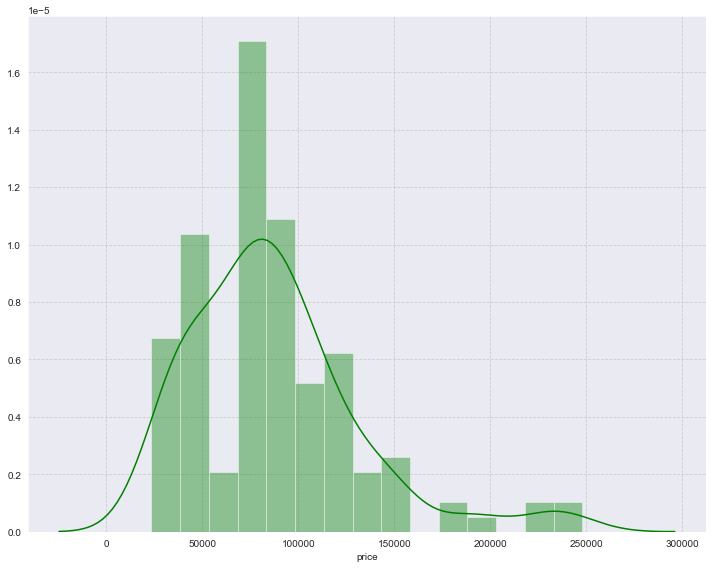

In [12]:
plt.figure(figsize=(10,8))
sns.set_style(style = 'darkgrid', rc = {'grid.color':'.8','grid.linestyle':'--'})
sns.distplot(df['price'], bins = 15, color = 'green')
plt.tight_layout()
plt.grid(True)
plt.show()

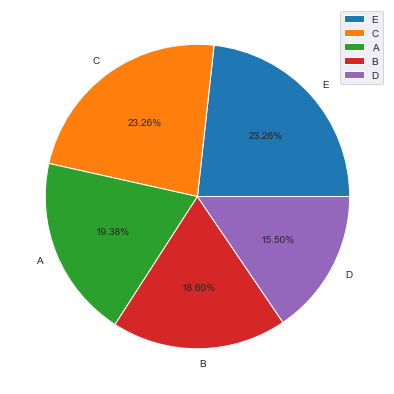

In [13]:
fig = plt.figure(figsize=(10,7))
company = df['company'].value_counts()
ax1 = plt.pie(df['company'].value_counts(), labels = company.keys(), autopct='%.2f%%')
plt.legend(company.keys())

<AxesSubplot:>

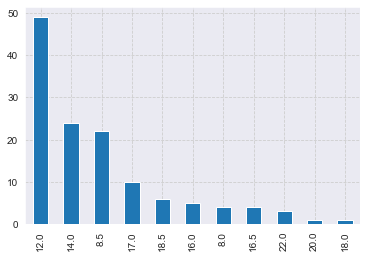

In [14]:
df['diameter'].value_counts().plot(kind = 'bar')

<AxesSubplot:>

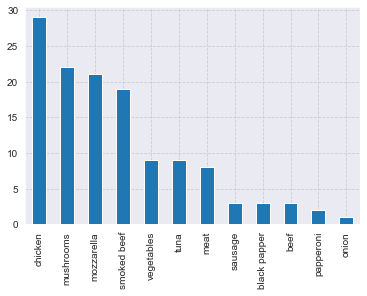

In [15]:
df['topping'].value_counts().plot(kind = 'bar')

<AxesSubplot:>

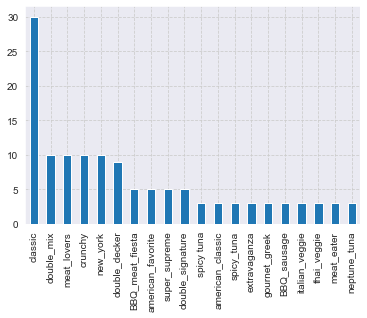

In [16]:
df['variant'].value_counts().plot(kind = 'bar')

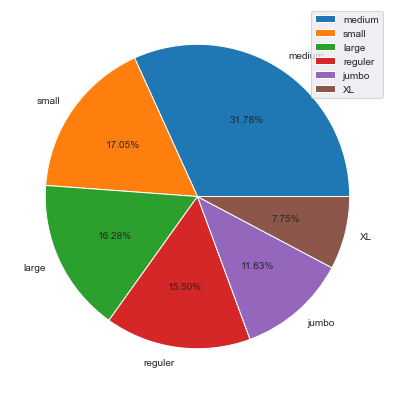

In [17]:
size = df['size'].value_counts()
fig = plt.figure(figsize = (10,7))
plt.pie(df['size'].value_counts(), labels = size.keys(), autopct='%.2f%%')
plt.legend(size.keys())

<AxesSubplot:>

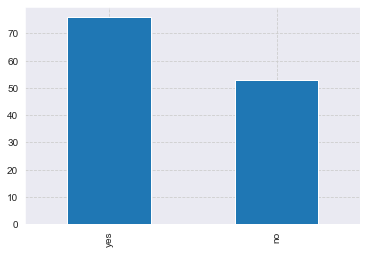

In [18]:
df['extra_sauce'].value_counts().plot(kind = 'bar')

<AxesSubplot:>

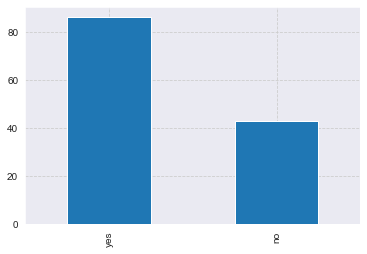

In [19]:
df['extra_cheese'].value_counts().plot(kind = 'bar')

<AxesSubplot:>

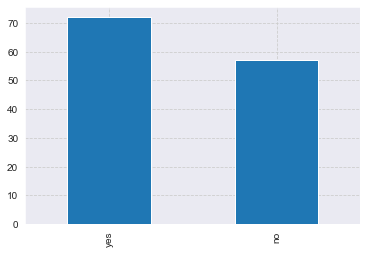

In [20]:
df['extra_mushrooms'].value_counts().plot(kind = 'bar')

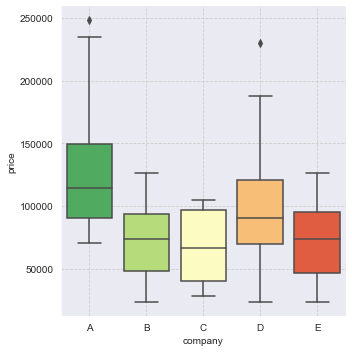

In [21]:
sns.catplot(x = 'company', y = 'price', kind = 'box', data = df, palette = 'RdYlGn_r', saturation = 0.9)
plt.tight_layout()
plt.grid(True)
plt.show()

In [22]:
df[df['price'] > 200000]

,company,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms,price
0,A,22.0,chicken,double_signature,jumbo,yes,yes,no,235000.0
4,A,18.0,mozzarella,double_signature,jumbo,yes,no,yes,248000.0
20,A,22.0,chicken,double_mix,jumbo,yes,yes,yes,230000.0
84,D,22.0,chicken,double_mix,jumbo,yes,yes,yes,230000.0


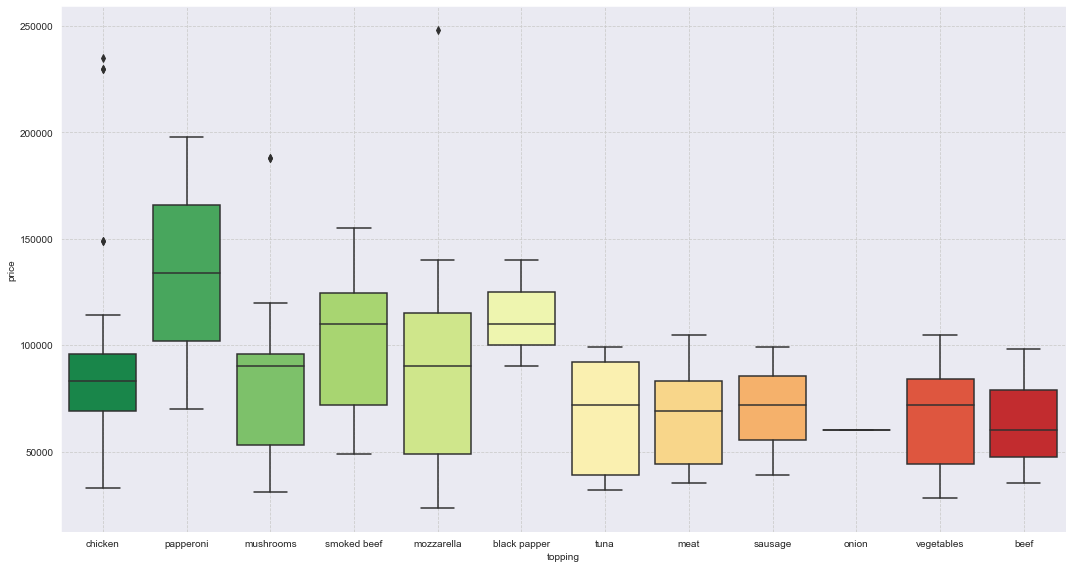

In [23]:
plt.figure(figsize=(15,8))
sns.boxplot(df['topping'],df['price'],palette='RdYlGn_r',saturation=0.9)
plt.tight_layout()
plt.grid(True)
plt.show()

In [24]:
df[(df['topping'] == 'chicken') & (df['price'] > 120000)]

,company,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms,price
0,A,22.0,chicken,double_signature,jumbo,yes,yes,no,235000.0
20,A,22.0,chicken,double_mix,jumbo,yes,yes,yes,230000.0
24,A,16.5,chicken,double_mix,reguler,yes,no,no,149000.0
84,D,22.0,chicken,double_mix,jumbo,yes,yes,yes,230000.0
88,D,16.5,chicken,double_mix,reguler,yes,no,yes,149000.0


In [25]:
df[(df['topping'] == 'mushrooms') & (df['price'] > 150000)]

,company,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms,price
21,A,18.5,mushrooms,double_mix,jumbo,yes,yes,yes,188000.0
85,D,18.5,mushrooms,double_mix,jumbo,yes,yes,yes,188000.0


In [26]:
df[(df['topping']=='mozzarella') & (df['price']>150000)]

,company,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms,price
4,A,18.0,mozzarella,double_signature,jumbo,yes,no,yes,248000.0


In [27]:
df[(df['topping']=='onion')]

,company,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms,price
59,C,12.0,onion,extravaganza,medium,yes,yes,no,60000.0


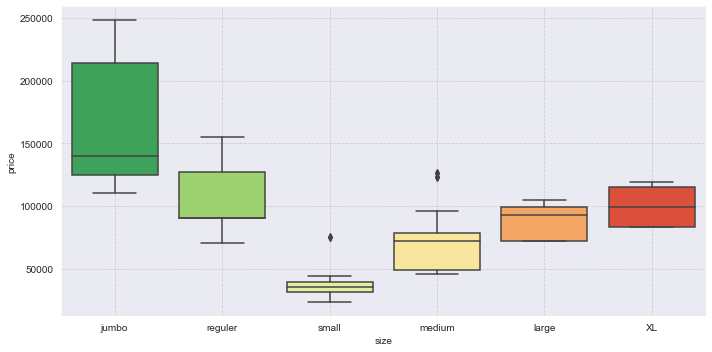

In [28]:
plt.figure(figsize=(10,5))
sns.boxplot(df['size'], df['price'], palette = 'RdYlGn_r', saturation=0.9)
plt.tight_layout()
plt.grid(True)
plt.show()

In [29]:
le = LabelEncoder()
features = (['company','topping','variant','size','extra_sauce','extra_cheese','extra_mushrooms'])
for col in features:
    df[col] = le.fit_transform(df[col])

df.head()

,company,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms,price
0,0,22.0,2,8,1,1,1,0,235000.0
1,0,20.0,7,8,1,1,1,0,198000.0
2,0,16.0,5,8,4,1,1,1,120000.0
3,0,14.0,9,8,4,1,0,1,155000.0
4,0,18.0,4,8,1,1,0,1,248000.0


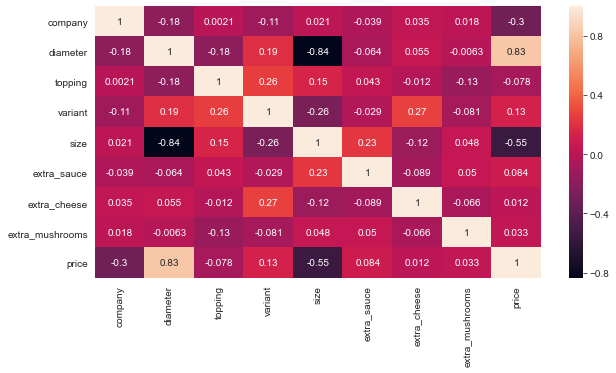

In [30]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [31]:
df.corr()['price'].sort_values(ascending=False).round(3)

price              1.000
diameter           0.827
variant            0.130
extra_sauce        0.084
extra_mushrooms    0.033
extra_cheese       0.012
topping           -0.078
company           -0.300
size              -0.552
Name: price, dtype: float64

# MODELING

In [32]:
X = df[features]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12)


In [33]:
# DECISION TREE

from sklearn.tree import DecisionTreeRegressor

model_dt = DecisionTreeRegressor(random_state=12)
model_dt.fit(X_train, y_train)
pred_dt = model_dt.predict(X_test)
print('R2 Score: ', r2_score(y_test, pred_dt) * 100)

R2 Score:  96.33404677411725


In [34]:
# XGBoost Regressor

model_xgb = XGBRFRegressor()
model_xgb.fit(X_train, y_train)
pred_xgb = model_xgb.predict(X_test)
print('R2 Score: ', r2_score(y_test, pred_xgb) * 100)



R2 Score:  89.37844403593435
